# inverse-design demo

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch import nn
from tqdm import trange
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv("data/data_inverse_model.csv")
X_name = [f'element {i}' for i in range(1,13)]
Y_name = [f'property {i}' for i in range(1,7)]
X = np.array(data[X_name].values)
Y = np.array(data[Y_name].values)
scaler = StandardScaler()
Y = scaler.fit_transform(Y)

TARGET = [-0.05795637837567597
         , 0.6312238714021171
         , 0.759084924046567
         , 0.39885104208581484
         , -0.003599773609153955
         , 1.3429499392913864]

RFR = RandomForestRegressor()
example_model = RFR.fit(pd.DataFrame(X),pd.DataFrame(Y)) #use to measure the accuracy
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# move tensors to GPU (or CPU)
X_train = torch.tensor(X_train).to(device)
Y_train = torch.tensor(Y_train).to(device)
X_test = torch.tensor(X_test).to(device)
Y_test = torch.tensor(Y_test).to(device)

## inverse-design-direct

In [4]:
from inverse_design_direct.direct_design import train_NN_clean, train_NN

### NN

In [5]:
model_nn, loss_hist, R2_hist= train_NN(Y_train, X_train, max_iter=30000)

epoch: 100, loss: 0.0546, R^2: -3274.9547
epoch: 200, loss: 0.0510, R^2: -2427.7004
epoch: 300, loss: 0.0471, R^2: -1768.1599
epoch: 400, loss: 0.0414, R^2: -1260.0286
epoch: 500, loss: 0.0344, R^2: -830.9809
epoch: 600, loss: 0.0288, R^2: -519.4130
epoch: 700, loss: 0.0254, R^2: -330.3496
epoch: 800, loss: 0.0235, R^2: -222.1175
epoch: 900, loss: 0.0223, R^2: -159.8665
epoch: 1000, loss: 0.0217, R^2: -123.7308
epoch: 1100, loss: 0.0212, R^2: -100.2477
epoch: 1200, loss: 0.0210, R^2: -84.3567
epoch: 1300, loss: 0.0207, R^2: -73.3346
epoch: 1400, loss: 0.0206, R^2: -65.3827
epoch: 1500, loss: 0.0204, R^2: -59.5122
epoch: 1600, loss: 0.0203, R^2: -54.9341
epoch: 1700, loss: 0.0202, R^2: -51.4005
epoch: 1800, loss: 0.0201, R^2: -48.9099
epoch: 1900, loss: 0.0199, R^2: -47.5916
epoch: 2000, loss: 0.0197, R^2: -47.3855
epoch: 2100, loss: 0.0193, R^2: -48.5903
epoch: 2200, loss: 0.0180, R^2: -53.1777
epoch: 2300, loss: 0.0153, R^2: -51.4681
epoch: 2400, loss: 0.0127, R^2: -47.9190
epoch: 250

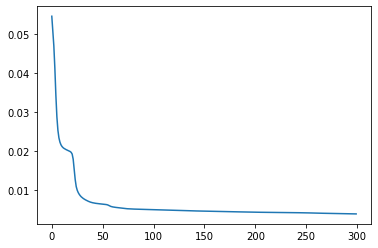

In [6]:
plt.plot(loss_hist)

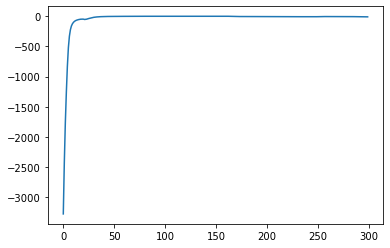

In [7]:
plt.plot(R2_hist)

In [ ]:
with torch.no_grad():
    MAE_NN = mean_absolute_error(model_nn(Y_test).cpu().numpy(), X_test.cpu().numpy())
    print(mean_absolute_error(model_nn(Y_test).cpu().numpy(), X_test.cpu().numpy()))

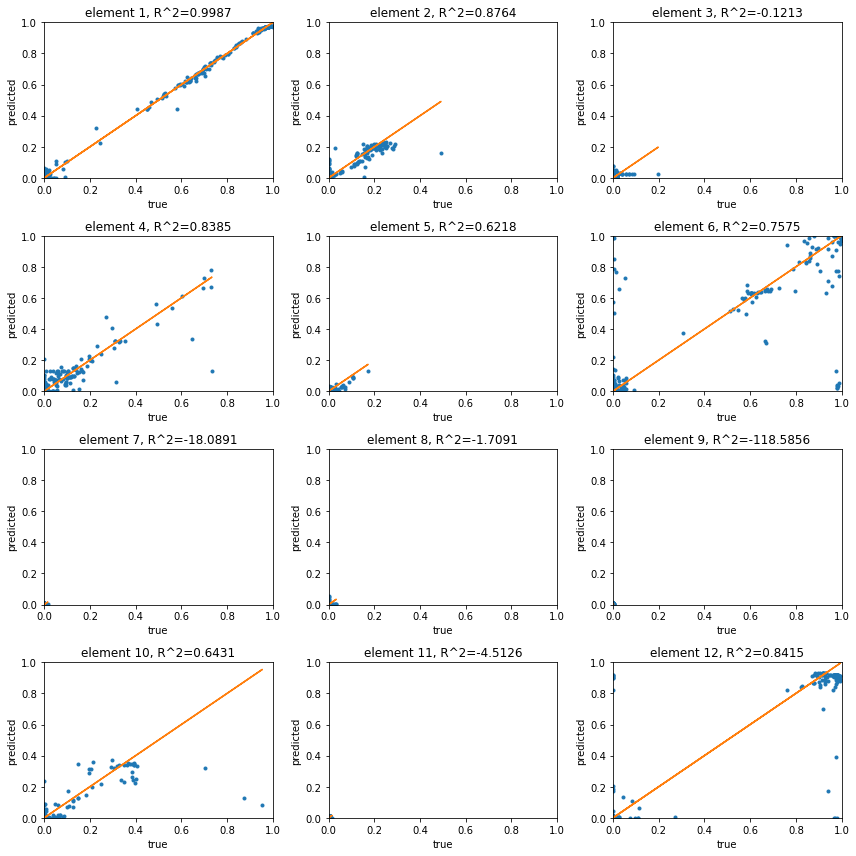

In [8]:
with torch.no_grad():
    X_pred = model_nn(Y_test).cpu().numpy()
    X_true = X_test.cpu().numpy()

fig, axs = plt.subplots(4, 3, figsize=(12,12))
for i in range(12):
    X_bar = np.mean(X_true[:,i])
    R_2 = 1 - np.sum((X_true[:,i] - X_pred[:,i])**2) / np.sum((X_true[:,i] - X_bar)**2)
    ax = axs[i // 3, i % 3]
    ax.plot(X_true[:, i], X_pred[:, i], '.')
    ax.plot(X_true[:, i], X_true[:, i], '-')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('true')
    ax.set_ylabel('predicted')
    ax.set_title(f'{X_name[i]}, R^2={R_2:.4f}')

plt.tight_layout()
plt.show()

### NN-clean

In [9]:
model_nn_clean, loss_hist, R2_hist= train_NN_clean(Y_train, X_train, max_iter=30000)

epoch: 100, loss: 0.0551, R^2: -3533.6871
epoch: 200, loss: 0.0513, R^2: -2611.8064
epoch: 300, loss: 0.0474, R^2: -1930.5537
epoch: 400, loss: 0.0423, R^2: -1435.3742
epoch: 500, loss: 0.0361, R^2: -1010.2364
epoch: 600, loss: 0.0305, R^2: -666.0300
epoch: 700, loss: 0.0266, R^2: -437.2218
epoch: 800, loss: 0.0242, R^2: -300.4746
epoch: 900, loss: 0.0225, R^2: -220.9415
epoch: 1000, loss: 0.0210, R^2: -175.7176
epoch: 1100, loss: 0.0190, R^2: -146.8360
epoch: 1200, loss: 0.0170, R^2: -121.4760
epoch: 1300, loss: 0.0152, R^2: -100.2542
epoch: 1400, loss: 0.0138, R^2: -83.6664
epoch: 1500, loss: 0.0130, R^2: -71.8056
epoch: 1600, loss: 0.0123, R^2: -63.7021
epoch: 1700, loss: 0.0118, R^2: -58.1078
epoch: 1800, loss: 0.0112, R^2: -53.4472
epoch: 1900, loss: 0.0107, R^2: -49.0581
epoch: 2000, loss: 0.0103, R^2: -45.5513
epoch: 2100, loss: 0.0100, R^2: -42.7872
epoch: 2200, loss: 0.0097, R^2: -40.2458
epoch: 2300, loss: 0.0094, R^2: -37.4676
epoch: 2400, loss: 0.0091, R^2: -34.1201
epoch: 

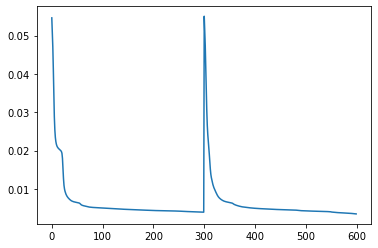

In [10]:
plt.plot(loss_hist)

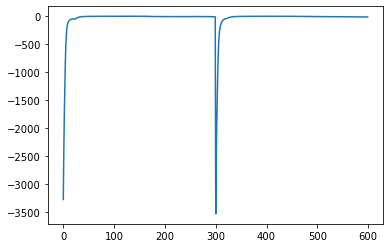

In [11]:
plt.plot(R2_hist)

In [12]:
with torch.no_grad():
    MAE_CLEAN_NN = mean_absolute_error(model_nn(Y_test).cpu().numpy(), X_test.cpu().numpy())
    print(mean_absolute_error(model_nn_clean(Y_test).cpu().numpy(), X_test.cpu().numpy()))

0.014294267746227962


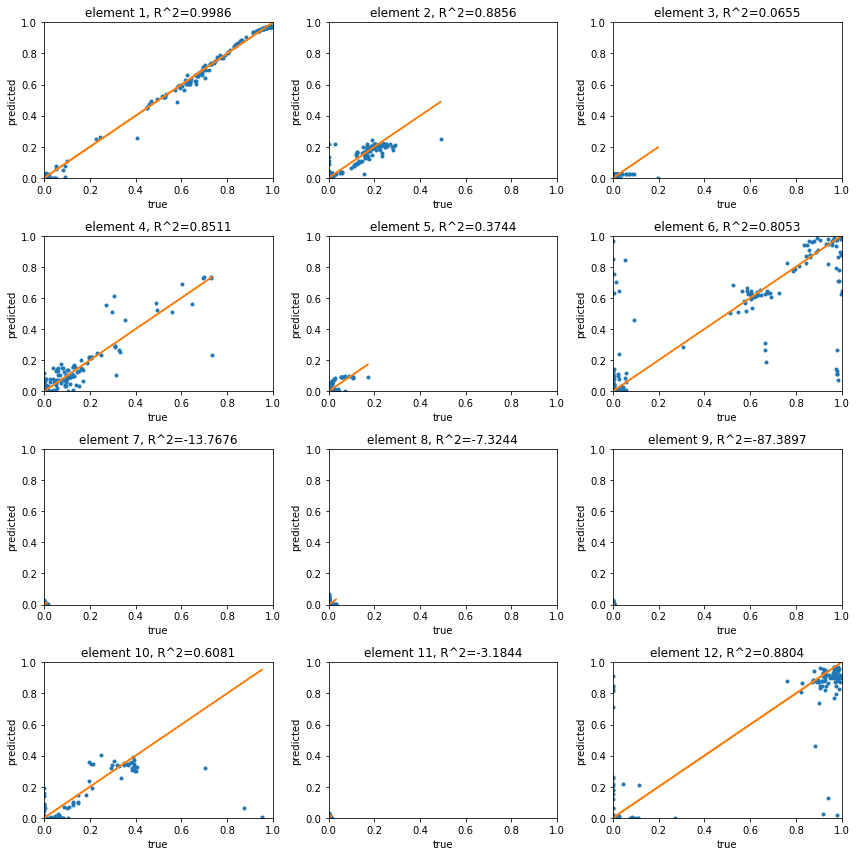

In [13]:
with torch.no_grad():
    X_pred = model_nn_clean(Y_test).cpu().numpy()
    X_true = X_test.cpu().numpy()

fig, axs = plt.subplots(4, 3, figsize=(12,12))
for i in range(12):
    X_bar = np.mean(X_true[:,i])
    R_2 = 1 - np.sum((X_true[:,i] - X_pred[:,i])**2) / np.sum((X_true[:,i] - X_bar)**2)
    ax = axs[i // 3, i % 3]
    ax.plot(X_true[:, i], X_pred[:, i], '.')
    ax.plot(X_true[:, i], X_true[:, i], '-')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('true')
    ax.set_ylabel('predicted')
    ax.set_title(f'{X_name[i]}, R^2={R_2:.4f}')

plt.tight_layout()
plt.show()

## inverse-search with BO, Tree-structured Parzen Estimator & CMA-ES

In [3]:
from inverse_design_iterative.inverse_search import inverse_search, inverse_BO

### BO method

In [4]:
target_list = []
X_MAE_list = []
for i in trange(len(Y_test)):

    Y_given = Y_test[i].reshape(1, -1)
    target, X_best = inverse_BO(X_train, Y_train, Y_given,scaler)

    target_list.append(target)
    X_MAE_list.append(mean_absolute_error(X_best, X_test[i].reshape(1, -1)))

100%|██████████████████████████████████████████████████████████████████████████████| 392/392 [1:48:56<00:00, 16.67s/it]


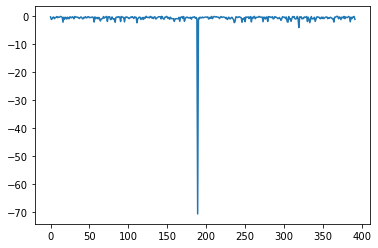

In [5]:
plt.plot(target_list)

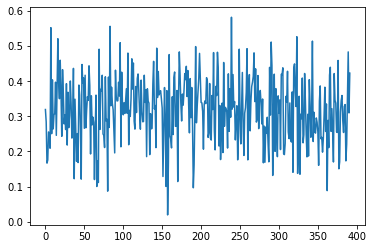

In [6]:
plt.plot(X_MAE_list)

In [7]:
MAE_BO = np.mean(X_MAE_list)
MAE_BO

0.31689873826203346

### Tree-structured Parzen Estimator & CMA-ES method


In [ ]:
ex_TPE = inverse_search(model = example_model,
                        target = TARGET
                        trial_num = 1000, #the circle of exploration
                        sampler="TPE", #three algorithms of sampling including "TPE"(Tree-structured Parzen Estimator),"CMA"(CMA-ES) and "RANDOM"(random sampling)
                        optim="MSE", #three optimizers including "MSE","MAE" and "R2"
                        use_soft=False, # using softmax function
                        pow_num=2   #using exponential function and the power frequency
                        )#only for sklearn model api

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
study, re_TPE = ex_TPE.run_search()

In [ ]:
re_TPE

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
re_TPE_list = []
for i in trange(len(Y_test)):
    Y_given = Y_test[i]
    print(Y_given)
    ex_TPE = inverse_search(model = example_model,
                        target = Y_given
                        trial_num = 1000, #the circle of exploration
                        sampler="TPE", #three algorithms of sampling including "TPE"(Tree-structured Parzen Estimator),"CMA"(CMA-ES) and "RANDOM"(random sampling)
                        optim="MSE", #three optimizers including "MSE","MAE" and "R2"
                        use_soft=False, # using softmax function
                        pow_num=2   #using exponential function and the power frequency
                        )#only for sklearn model api
    study, re_TPE = ex_TPE.run_search()
    re_TPE_list.append(re_TPE)
MAE_TPE = mean_absolute_error(re_TPE_list.reshape(1, -1), X_test.reshape(1, -1))

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
re_CMA_list = []
for i in trange(len(Y_test)):
    Y_given = Y_test[i]
    print(Y_given)
    ex_CMA = inverse_search(model = example_model,
                        target = Y_given
                        trial_num = 1000, #the circle of exploration
                        sampler="CMA", #three algorithms of sampling including "TPE"(Tree-structured Parzen Estimator),"CMA"(CMA-ES) and "RANDOM"(random sampling)
                        optim="MSE", #three optimizers including "MSE","MAE" and "R2"
                        use_soft=False, # using softmax function
                        pow_num=2   #using exponential function and the power frequency
                        )#only for sklearn model api
    study, re_CMA = ex_TPE.run_search()
    re_CMA_list.append(re_CMA)
MAE_TPE = mean_absolute_error(re_CMA_list.reshape(1, -1), X_test.reshape(1, -1))

## inverse-design using CVAE

In [ ]:
from inverse_design_generative.inverse_generation import inverse_design_cvae

In [24]:
ex_vae = inverse_design_cvae(elements=X
                                , properties=Y
                                , epoch=10000
                                , target=TARGET
                                )

results, _, _ = ex_vae.run_cvae()
res = ex_vae.run_design()

print(res)

cal = example_model.predict(np.array([res]))
print(mean_squared_error(cal, np.array([TARGET])))

100%|██████████| 10000/10000 [00:59<00:00, 168.91it/s]

[9.9987650e-01 2.6683532e-14 1.1091202e-16 1.2348109e-04 4.3175760e-16
 1.2771731e-25 2.5878577e-16 1.0071004e-14 7.0478291e-14 5.3212973e-15
 5.9271944e-15 1.0959468e-25]
0.3887579303411229


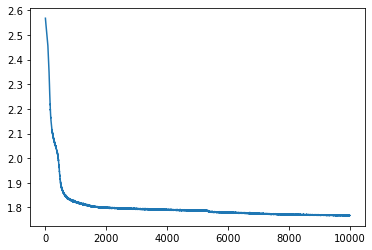

In [26]:
plt.plot(results['loss'])

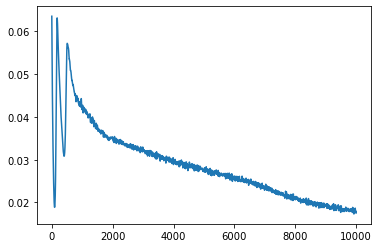

In [27]:
plt.plot(results['kld'])

In [28]:
mse_accum = []
for i in range(1000):
    ex_vae = inverse_design_cvae(elements=X
                                , properties=Y
                                , epoch=i
                                , target=TARGET
                                )

    results, _, _ = ex_vae.run_cvae()
    res = ex_vae.run_design()
    cal = example_model.predict(np.array([res]))
    mse_accum.append(mean_squared_error(cal, np.array([TARGET])))

0it [00:00, ?it/s]
100%|██████████| 1999/1999 [00:11<00:00, 169.69it/s]


In [ ]:
plt.plot(mse_accum)

# inverse-design Evaluation

In [8]:
X_MAE_list

[0.31920714113115184,
 0.28403932015045225,
 0.16677492962907445,
 0.17555464355816278,
 0.25538931788931785,
 0.2523026758781225,
 0.20917379539806655,
 0.5519645712054791,
 0.2504954828821661,
 0.4035342310384516,
 0.26412311716459136,
 0.30461082732417966,
 0.3071433277643814,
 0.39692722956203474,
 0.2457742191257594,
 0.3880186766972844,
 0.5204975240762372,
 0.3957969566358239,
 0.34990765679881264,
 0.4593435687701957,
 0.3711335429655411,
 0.24294402517290536,
 0.4326300928843863,
 0.3649822014766981,
 0.27840831810673056,
 0.30374143882010446,
 0.26221065494626306,
 0.3927993021483911,
 0.21819863587915012,
 0.36825373572352804,
 0.2676507495070514,
 0.30194726064634375,
 0.4002804904459791,
 0.3351280796214717,
 0.23802623768741205,
 0.28304619247461466,
 0.4362079663706732,
 0.12238587971507996,
 0.3485263835630388,
 0.25853127779647506,
 0.17183209101608474,
 0.25082926991077054,
 0.16843364048876333,
 0.3887731949254732,
 0.36052314257340873,
 0.2650331113244129,
 0.121320